In [2]:
# 使用make_blobs函数来生成数据
from sklearn.datasets.samples_generator import make_blobs

In [3]:
# 生成数据的过程
# 这个是指定生成数据的中心点
centers = [[-2,2],[2,2],[0,4]]
# n_samples待生成样本的特征数量
# centers就是中心点，围绕着这个中心点生成数据
# cluster_std 每个类别的标准差，例如我们生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]
x,y = make_blobs(n_samples=60,centers=centers,cluster_std=0.6)

In [4]:
x

array([[ 2.73335328,  1.56902978],
       [-0.75477236,  5.06317575],
       [ 2.57214319,  2.45090079],
       [-1.38172386,  2.56258294],
       [ 0.62561788,  3.92051727],
       [-1.32548967,  4.88340941],
       [ 2.58190638,  1.68845451],
       [-1.78538537,  2.07053406],
       [-2.07526788,  2.51422793],
       [-1.31558355,  1.32541459],
       [ 0.19957726,  3.84182431],
       [ 1.29913706,  2.13281807],
       [-0.84438294,  2.95454295],
       [-2.33997108,  2.21043475],
       [ 2.03483437,  2.23840722],
       [-2.42583183,  1.36809141],
       [ 1.83240143,  0.6635075 ],
       [-0.01372167,  3.69060851],
       [ 2.42866675,  1.42594283],
       [-0.79341545,  4.31097767],
       [-0.96534502,  2.70791985],
       [ 2.03570629,  1.18000859],
       [ 1.81615906,  2.0753268 ],
       [ 1.65177748,  2.55473539],
       [-1.7258684 ,  2.65472432],
       [ 2.51314285,  1.24487452],
       [-2.21957944,  0.89612409],
       [-2.76700654,  1.92916664],
       [ 1.70397133,

In [10]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2])

In [5]:
x[59]

array([0.25246041, 3.72322159])

# 数据可视化

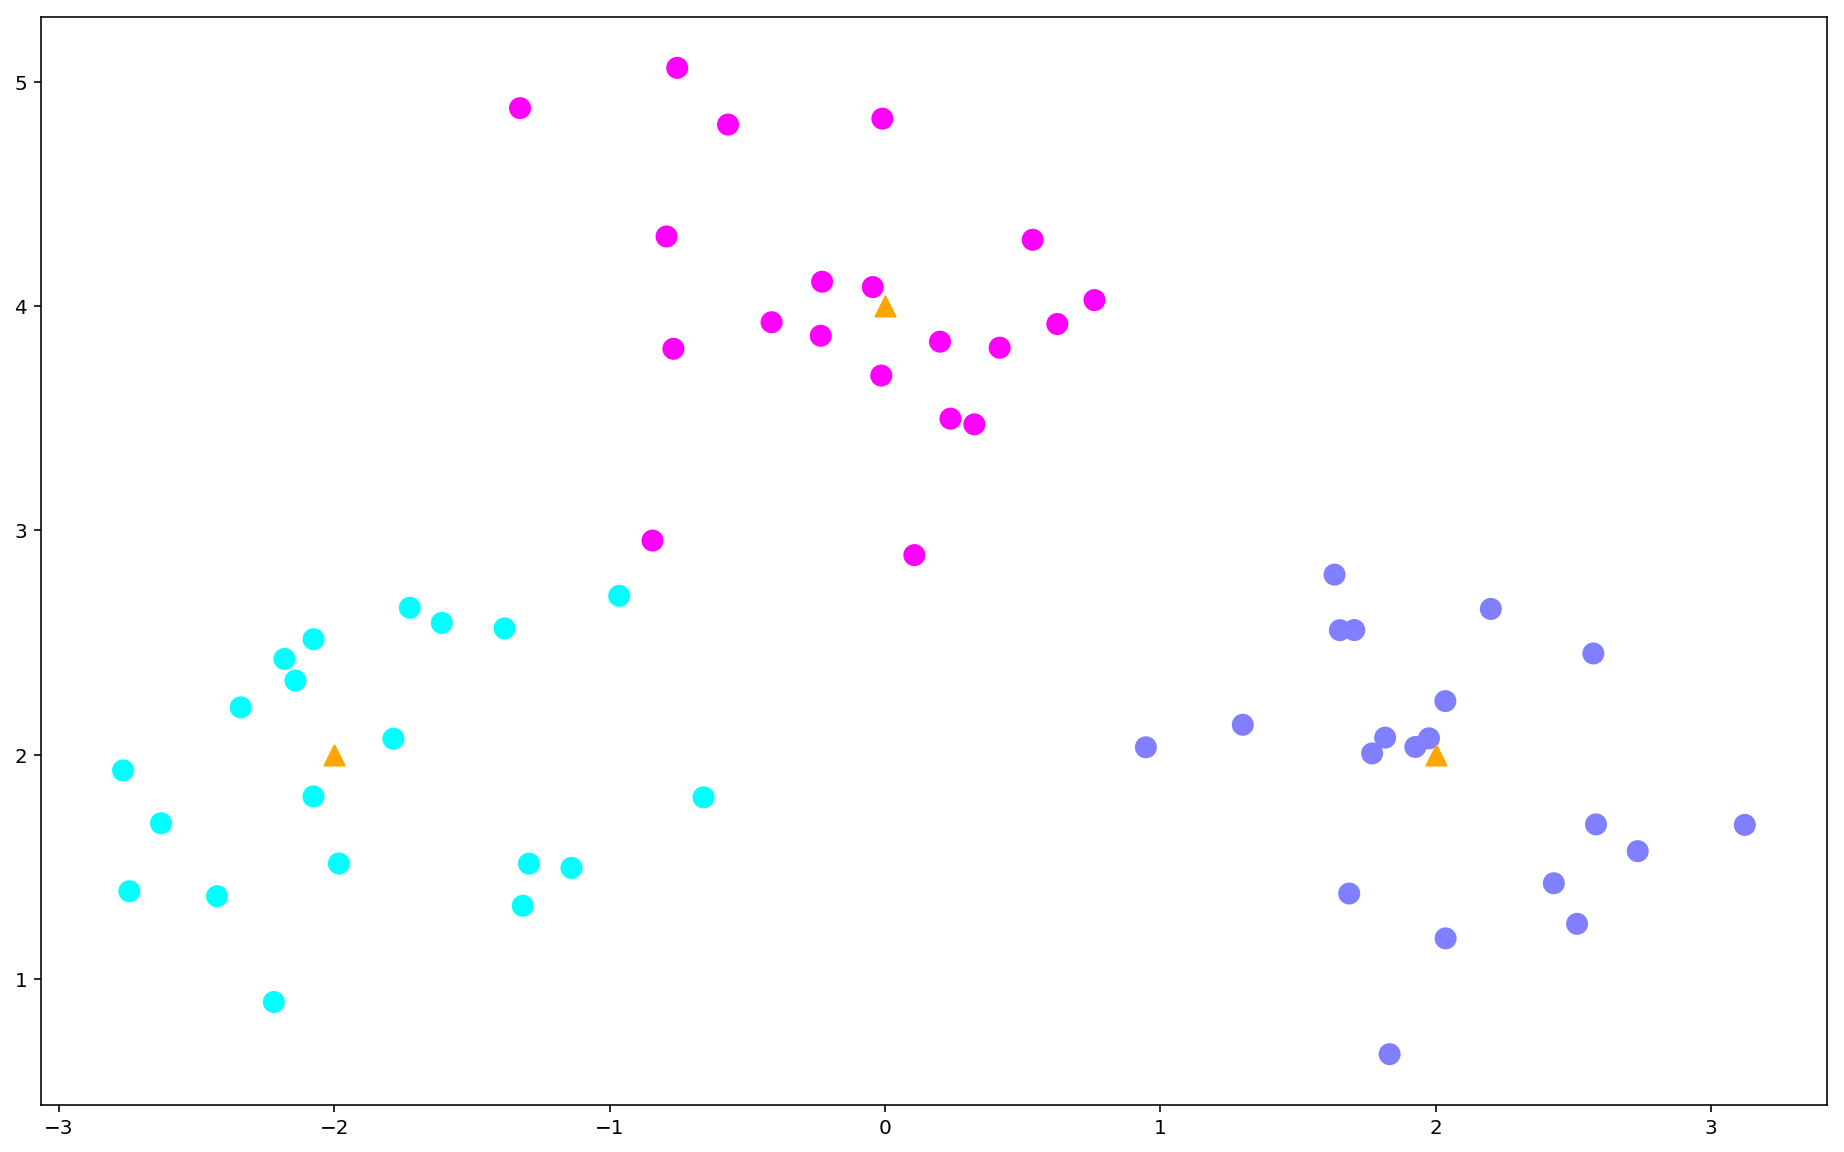

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,10),dpi=144)
centers = np.array(centers)

plt.scatter(x[:,0],x[:,1],c=y,s=100,cmap='cool')

# 画出中心点
plt.scatter(centers[:,0],centers[:,1],s=100,marker='^',c='orange')

plt.show()

In [14]:
centers

array([[-2,  2],
       [ 2,  2],
       [ 0,  4]])

In [15]:
centers[:,1]

array([2, 2, 4])

In [16]:
centers[:,0]

array([-2,  2,  0])

# 使用k近邻来对算法进行训练

In [7]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
# 模型训练
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
x

array([[ 2.73335328,  1.56902978],
       [-0.75477236,  5.06317575],
       [ 2.57214319,  2.45090079],
       [-1.38172386,  2.56258294],
       [ 0.62561788,  3.92051727],
       [-1.32548967,  4.88340941],
       [ 2.58190638,  1.68845451],
       [-1.78538537,  2.07053406],
       [-2.07526788,  2.51422793],
       [-1.31558355,  1.32541459],
       [ 0.19957726,  3.84182431],
       [ 1.29913706,  2.13281807],
       [-0.84438294,  2.95454295],
       [-2.33997108,  2.21043475],
       [ 2.03483437,  2.23840722],
       [-2.42583183,  1.36809141],
       [ 1.83240143,  0.6635075 ],
       [-0.01372167,  3.69060851],
       [ 2.42866675,  1.42594283],
       [-0.79341545,  4.31097767],
       [-0.96534502,  2.70791985],
       [ 2.03570629,  1.18000859],
       [ 1.81615906,  2.0753268 ],
       [ 1.65177748,  2.55473539],
       [-1.7258684 ,  2.65472432],
       [ 2.51314285,  1.24487452],
       [-2.21957944,  0.89612409],
       [-2.76700654,  1.92916664],
       [ 1.70397133,

In [10]:
y

array([1, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2])

In [16]:
# 对一个新的样本进行预测
x_sample = [[0,2]]
# 使用模型进行预测
neighbors = clf.kneighbors(x_sample, return_distance=False)
neighbors

array([[33, 44, 56, 20, 51]], dtype=int64)

In [5]:
# 把待预测的样本以及其最近的5个点标记出来

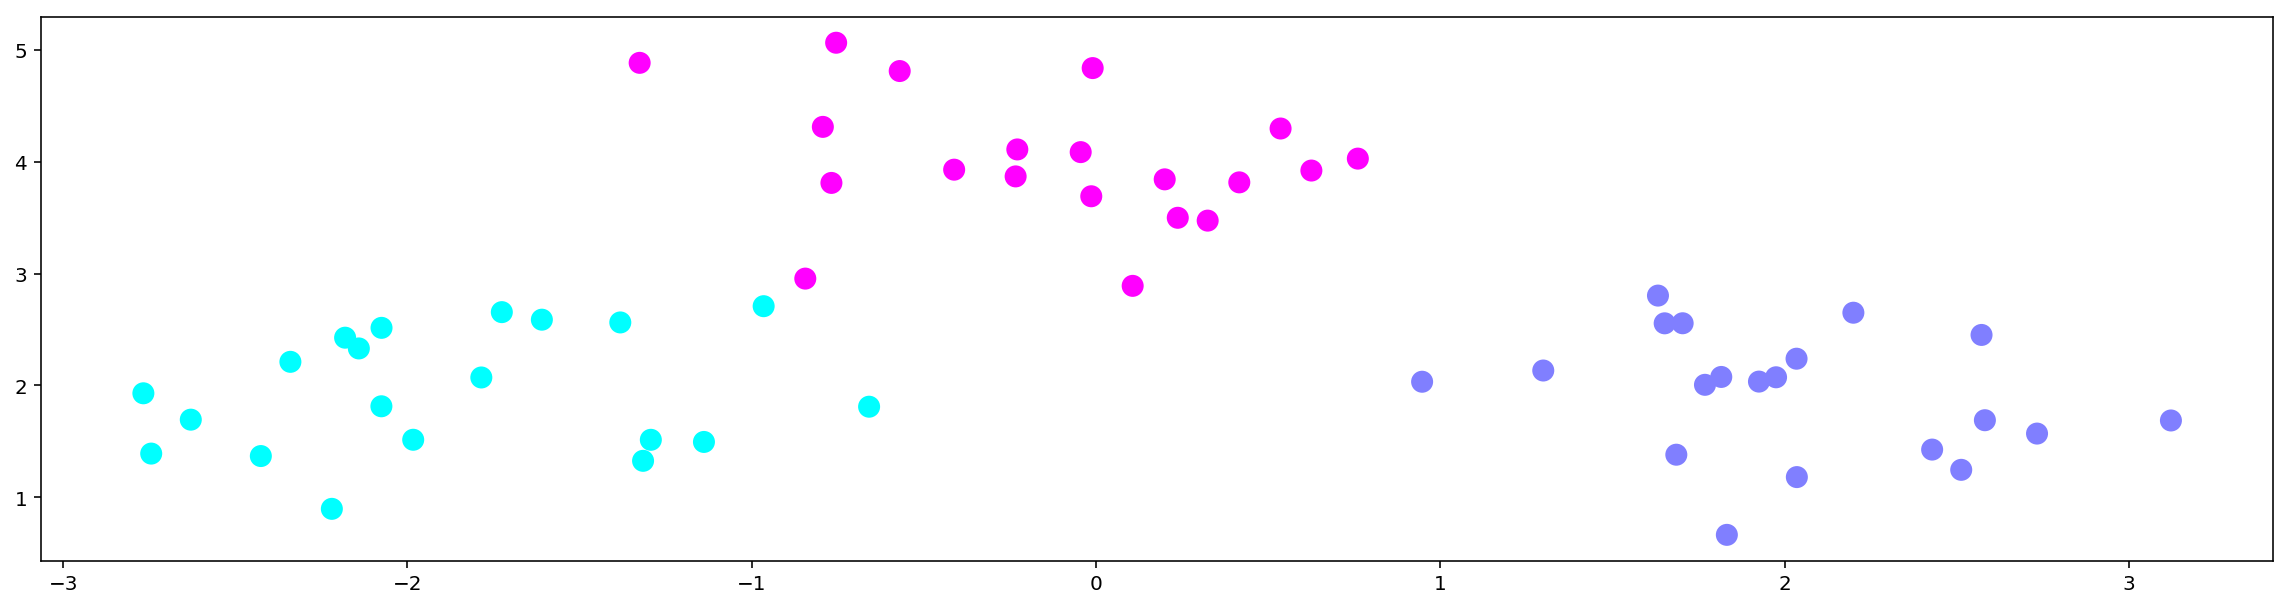

In [24]:
plt.figure(figsize=(20,5),dpi=144)

#画出类别
plt.scatter(x[:,0],x[:,1],c=y,s=100,cmap='cool')

plt.show()

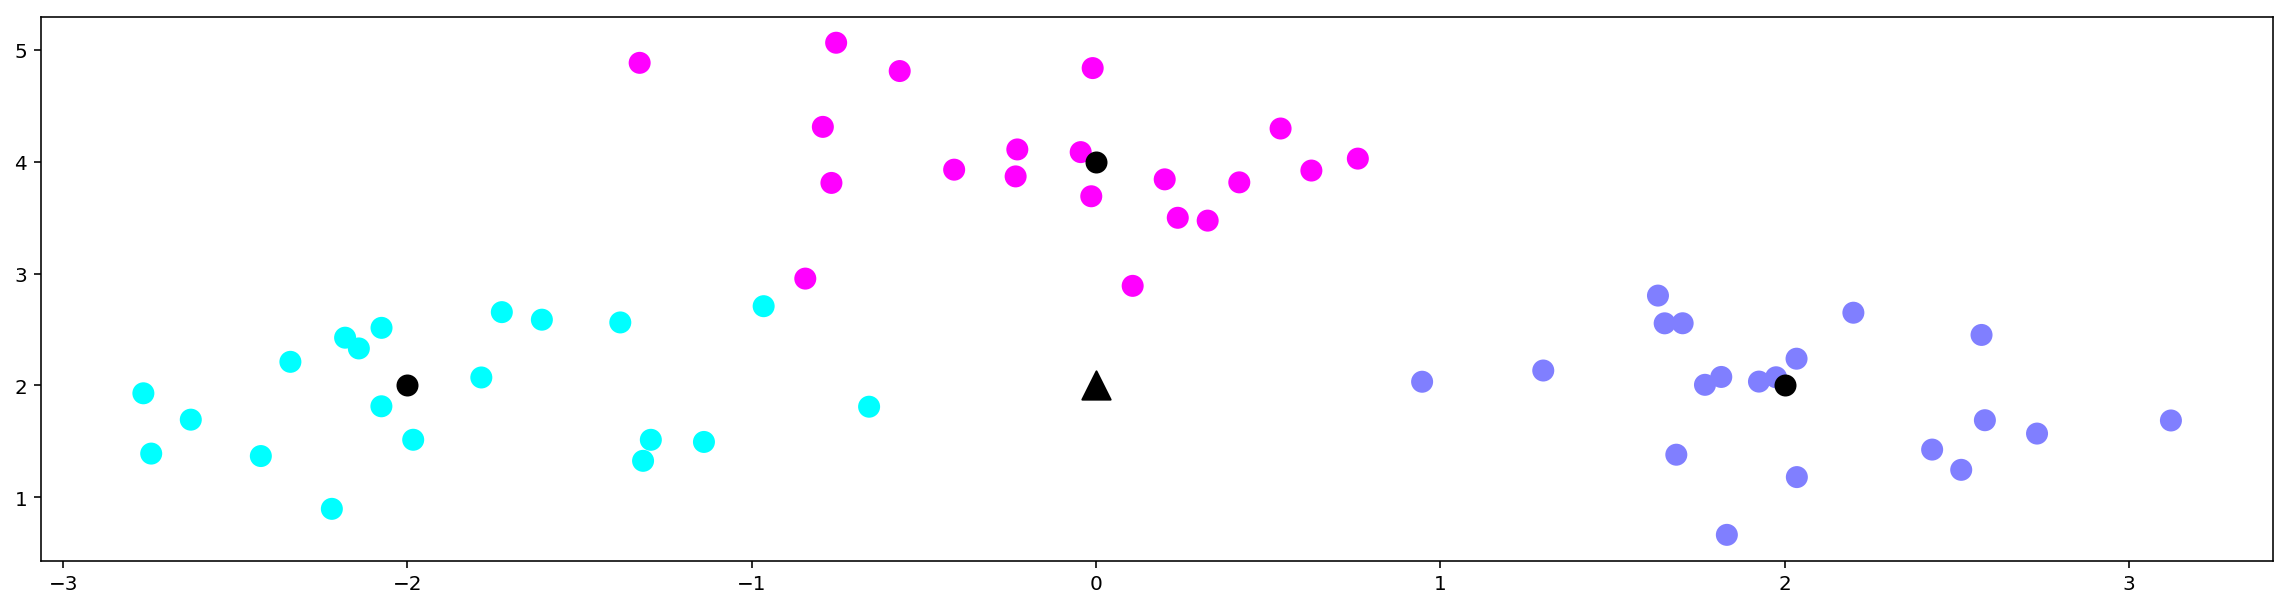

In [26]:
plt.figure(figsize=(20,5),dpi=144)
plt.scatter(x[:,0],x[:,1],c=y,s=100,cmap='cool')

#画出类别的中心点
plt.scatter(centers[:,0],centers[:,1],s=100,marker='o',c='k')

# 画出待遇测点
plt.scatter(x_sample[0][0],x_sample[0][1],marker='^',c='k',s=200)


plt.show()

In [27]:
# 把预测点与距离最近的5个样本连成线

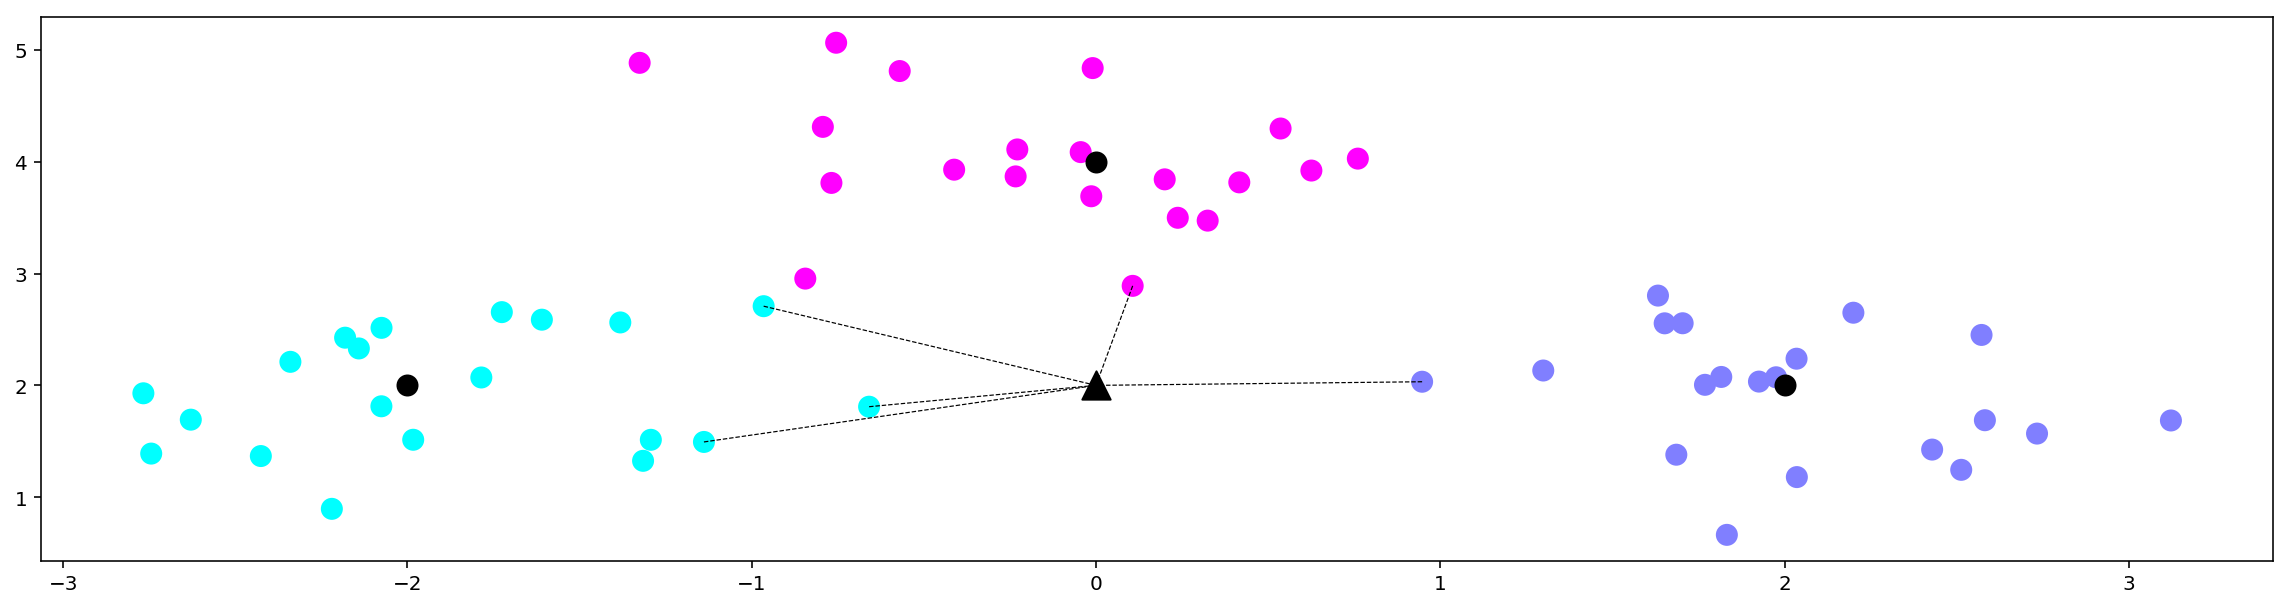

In [28]:
plt.figure(figsize=(20,5),dpi=144)
plt.scatter(x[:,0],x[:,1],c=y,s=100,cmap='cool')

#画出类别的中心点
plt.scatter(centers[:,0],centers[:,1],s=100,marker='o',c='k')

# 画出待遇测点
plt.scatter(x_sample[0][0],x_sample[0][1],marker='^',c='k',s=200)


# 把预测点与距离最近的5个样本连成线
for i in neighbors[0]:
    plt.plot([x[i][0],x_sample[0][0]], [x[i][1], x_sample[0][1]], 'k--', linewidth=0.6)
plt.show()

# iris数据集是常用的分类试验数据集

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size=0.25)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
# 获取预测结果
y_predict = knn.predict(x_test)
y_predict

array([0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1])

In [35]:
knn.predict(x_train)

array([2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1,
       0, 1])

In [37]:
knn.score(x_test,y_test)

0.8947368421052632

In [34]:
##  展示一下结果
labels = ['山鸢尾','虹膜锦葵','变色鸢尾']
for i in range(len(y_predict)):
    print("第%d次测试：真实值是%s \t 预测值是:%s"%((i+1),labels[y_test[i]], labels[y_predict[i]]))
    

第1次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第2次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第3次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第4次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第5次测试：真实值是虹膜锦葵 	 预测值是:虹膜锦葵
第6次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第7次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第8次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第9次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第10次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第11次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第12次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第13次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第14次测试：真实值是虹膜锦葵 	 预测值是:虹膜锦葵
第15次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第16次测试：真实值是虹膜锦葵 	 预测值是:虹膜锦葵
第17次测试：真实值是虹膜锦葵 	 预测值是:虹膜锦葵
第18次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第19次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第20次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第21次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第22次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第23次测试：真实值是虹膜锦葵 	 预测值是:虹膜锦葵
第24次测试：真实值是虹膜锦葵 	 预测值是:变色鸢尾
第25次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第26次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第27次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第28次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第29次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第30次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第31次测试：真实值是变色鸢尾 	 预测值是:虹膜锦葵
第32次测试：真实值是虹膜锦葵 	 预测值是:变色鸢尾
第33次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第34次测试：真实值是变色鸢尾 	 预测值是:变色鸢尾
第35次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第36次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第37次测试：真实值是山鸢尾 	 预测值是:山鸢尾
第

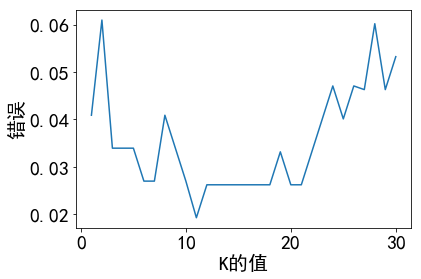

In [38]:
from sklearn.model_selection import cross_val_score

font = {'family':'SimHei','size':20}
plt.rc('font',**font)

iris = load_iris()
x = iris.data
y = iris.target
k_range = range(1,31)
k_error=[]
# 循环 取k=1到30，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn,x,y,cv=6)
    k_error.append(1 - scores.mean())
# 画图
plt.plot(k_range,k_error)
plt.xlabel('K的值')
plt.ylabel('错误')
plt.show()